In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

###
CRIM - per capita crime rate by town 
ZN - proportion of residental land zoned for lots over 25,000 
INDUS - proportion of non-retail business acres per town
CHAS - charles river dummy variable(1=tract bounds river, 0=otherwise)
NOX - nitric oxides concentraction(parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [32]:
df = pd.read_csv('./data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Verify the dataset for any duplicates, nulls, or missing values (NaNs) to ensure data quality before analysis.

In [33]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [34]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [35]:
df.duplicated().any()

np.False_

Create a heatmap to visualize collerations beetwens features.

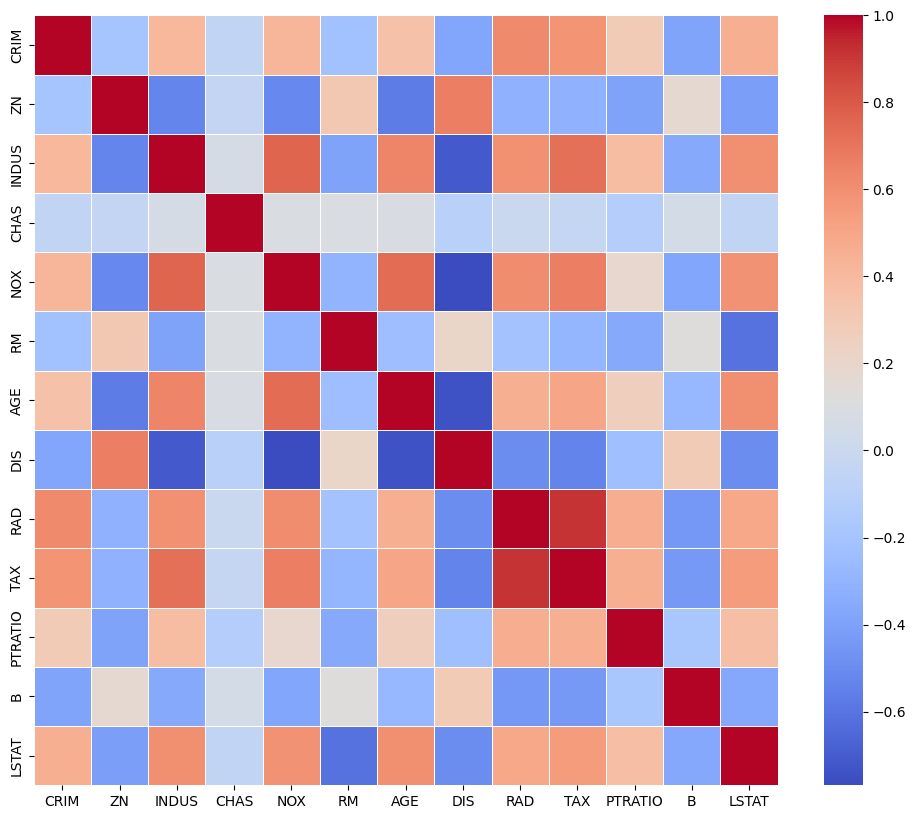

<Figure size 640x480 with 0 Axes>

In [36]:
cor_matrix = df.drop(['MEDV'], axis=1).corr()

plt.figure(figsize=(12,10))
sns.heatmap(cor_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()
plt.savefig('./screenshots/Heatmap.png')

Split the dataset into tranning and test sets.

In [37]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Create a model, fit featues and predict values.

In [40]:
models = {
    'KNN' : KNeighborsRegressor(),
    'DecisionTree' : DecisionTreeRegressor(random_state=42),
    'LinearRegresion' : LinearRegression(),
    'RandomForestRegresosr' : RandomForestRegressor(random_state=42),
    'GradientBoostRegressor' : GradientBoostingRegressor(random_state=42)
}

result = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    result[name] = {'Mean squad error': mse, 'R^2 score': r2}

results_df = pd.DataFrame(result).T
print(results_df)



                        Mean squad error  R^2 score
KNN                            20.657325   0.718311
DecisionTree                   11.142843   0.848053
LinearRegresion                24.291119   0.668759
RandomForestRegresosr           8.100480   0.889540
GradientBoostRegressor          6.240173   0.914907


In [41]:
r2_GBR = results_df.loc['GradientBoostRegressor', 'R^2 score']
mse_GBR = results_df.loc['GradientBoostRegressor', 'Mean squad error']
print(r2_GBR, mse_GBR)

0.914907252103386 6.240173122766323


In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.15, 0.2, 0.3],
    'max_depth': [2,3,4,5]
}

grid = GridSearchCV(GradientBoostingRegressor(random_state=43), param_grid, cv=5, scoring='r2')
grid.fit(X_train,y_train)



,estimator,GradientBoost...ndom_state=43)
,param_grid,"{'learning_rate': [0.1, 0.15, ...], 'max_depth': [2, 3, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [43]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print("Best parameters:", grid.best_params_)
print(f"R²: {r2_best:.4f}")
print(f"MSE: {mse_best:.4f}")

Best parameters: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100}
R²: 0.9106
MSE: 6.5592


Check feature importance to identify which variables have the gratest impact on the model's predictions.

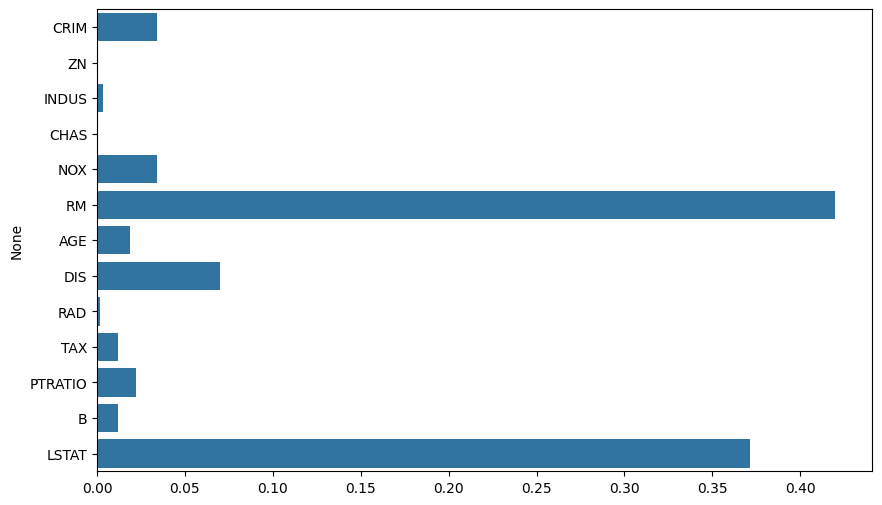

<Figure size 640x480 with 0 Axes>

In [44]:
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances,y=features)
plt.show()
plt.savefig('./screenshots/Features_importances.png')


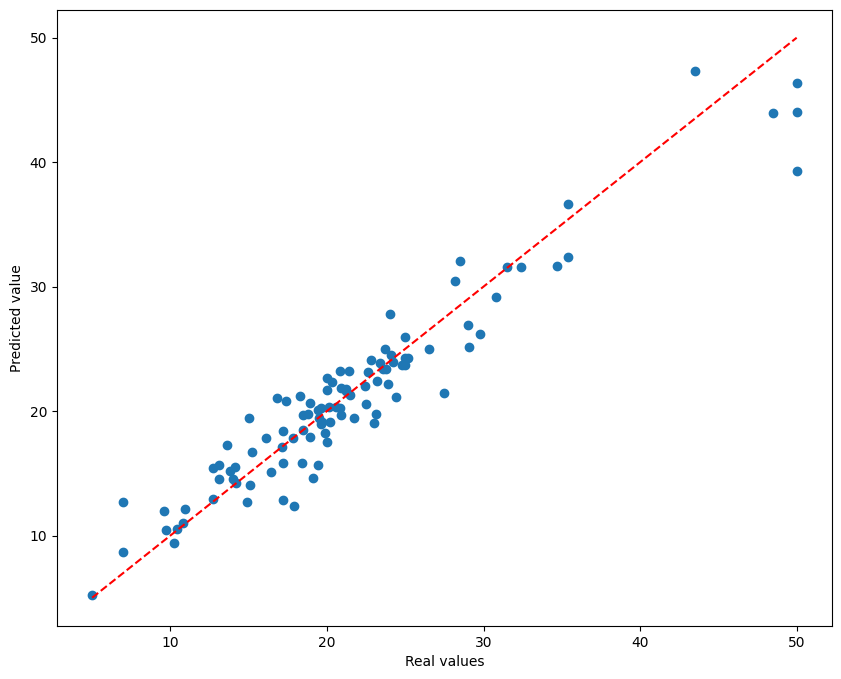

<Figure size 640x480 with 0 Axes>

In [45]:
y_pred = best_model.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel("Real values")
plt.ylabel("Predicted value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linia idealna
plt.show()
plt.savefig("./screenshots/Real_vs_predicted_values.png")

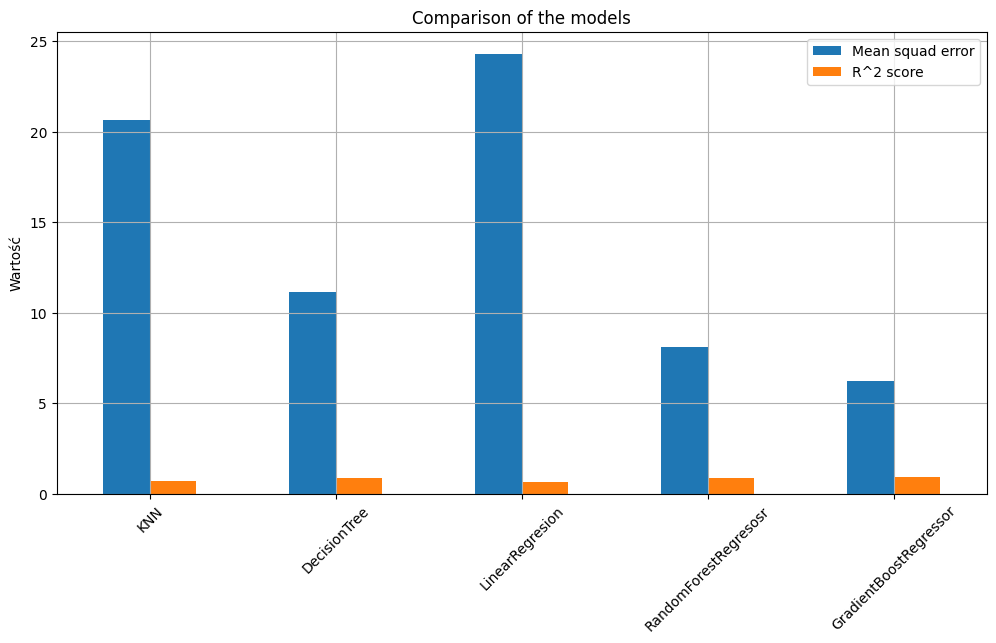

<Figure size 640x480 with 0 Axes>

In [46]:
results_df.plot(kind='bar', figsize=(12,6))
plt.title("Comparison of the models")
plt.ylabel("Wartość")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig('./screenshots/Comparison_models.png')

Porównanie modeli:

          Model  R2 Score       MSE
0         Basic  0.914907  6.240173
1  GridSearchCV  0.910556  6.559238


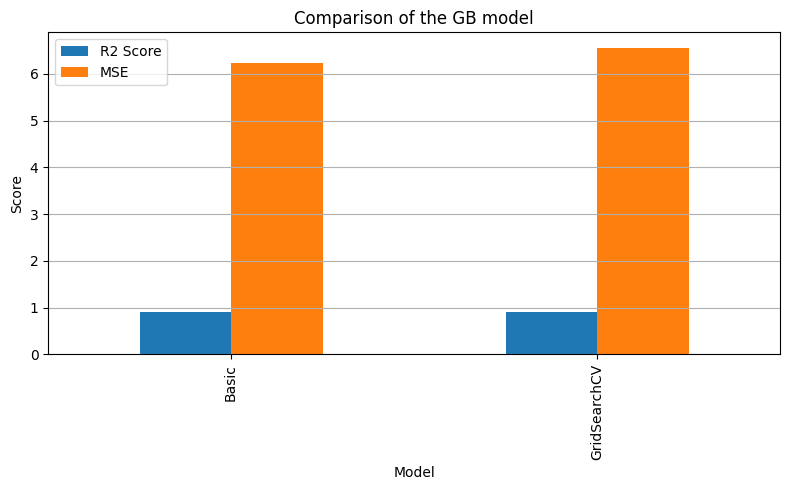

<Figure size 640x480 with 0 Axes>

In [47]:
results = pd.DataFrame({
    'Model': ['Basic', 'GridSearchCV'],
    'R2 Score': [r2_GBR, r2_best],
    'MSE': [mse_GBR, mse_best]
})

print("Porównanie modeli:\n")
print(results)

# Wykres
results.set_index("Model")[["R2 Score", "MSE"]].plot(kind='bar', figsize=(8,5), title="Comparison of the GB model")
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('./screenshots/Basic_ss_grid_search_CV.png')

In [48]:
import joblib
joblib.dump(best_model, './model/model.pkl')


['./model/model.pkl']